In [57]:
#coding=utf8

##分类器比较

scikit-learn中几种分类器在合成数据集上的比较。
这个示例的目的是说明不同分类器的决策边界的性质。
我们应该持保留态度，因为这些例子所传达的直觉并不一定适用于真实的数据集。
特别是在高维空间中，数据更容易线性分离，而朴素贝叶斯和线性支持向量机等分类器的简单性可能导致比其他分类器实现更好的泛化。
故事情节展示


In [58]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


sklearn.datasets.make_classification
功能：生成样本集，通常用于分类算法

|参数	    |说明|
|-|-|
n_samples       |	int, optional (default=100)样本数。
n_features      |	int, optional (default=20)功能总数。这些包括随机绘制的n_informative信息特征，n_redundant冗余特征，n_repeated重复特征和n_features-n_informative-n_redundant-n_repeated无用特征。
n_informative       |	int, optional (default=2)信息特征的数量。每个类都由多个高斯簇组成，每个簇围绕着超立方体的顶点位于n_informative维子空间中。对于每个聚类，独立于N（0，1）绘制信息特征，然后在每个聚类内随机线性组合以增加协方差。 然后将簇放置在超立方体的顶点上。
n_redundant     |	int, optional (default=2)冗余特征的数量。 这些特征是作为信息特征的随机线性组合生成的。
n_repeated      |	int, optional (default=0)从信息性和冗余性特征中随机抽取的重复性特征的数量。
n_classes       |	int, optional (default=2)分类问题的类（或标签）数。
n_clusters_per_class   |	int, optional (default=2)每个类的簇数。
weights     |	array-like of shape (n_classes,) or (n_classes - 1,), (default=None)分配给每个类别的样本比例。 如果为None，则类是平衡的。 请注意，如果len（weights）== n_classes-1，则自动推断最后一个类的权重。如果weights之和超过1，则可能返回多于n_samples个样本。
flip_y      |	float, optional (default=0.01)类别随机分配的样本比例。 较大的值会在标签中引入噪音，并使分类任务更加困难。 请注意，在某些情况下，默认设置flip_y> 0可能导致y中的类少于n_class。
class_sep   |	float, optional (default=1.0)超立方体大小乘以的因子。 较大的值分散了群集/类，并使分类任务更加容易。
hypercube   |	boolean, optional (default=True)如果为True，则将簇放置在超立方体的顶点上。 如果为False，则将簇放置在随机多面体的顶点上。
shift   |	float, array of shape [n_features] or None, optional (default=0.0)按指定值移动特征。 如果为None，则将特征移动[-class_sep，class_sep]中绘制的随机值。
scale   |	float, array of shape [n_features] or None, optional (default=1.0)将特征乘以指定值。如果为None，则将按[1，100]中绘制的随机值缩放要素。请注意，缩放发生在移位之后。
shuffle |	shuboolean, optional (default=True)shuffle样本和特征。
random_state    |	int, RandomState instance, default=None确定用于生成数据集的随机数生成。 为多个函数调用传递可重复输出的int值。 请参阅词汇表。

|返回值	|说明
|-|-|
X       |	array of shape [n_samples, n_features]生成的样本。
y       |	array of shape [n_samples]每个样本的类成员的整数标签。

In [59]:
%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[0])  #可以通过下标进行选择适合自己的画图样式
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [60]:
h = 0.02  # step size in the mesh 网格中的步长

names = [
    "Linear SVM",  #线性分类器
    "RBF SVM",  #径向基核函数分类器
    "poly",  #多项式核函数分类器
    "LogisticRegression",  #逻辑回归分类器
    "Nearest Neighbors",  #最近邻居分类器
    "Decision Tree",  #决策树分类器
    "Random Forest",  #随机森林分类器
    "Neural Net",  #神经网络分类器
    "AdaBoost",  #通过迭代弱分类器而产生最终的强分类器
    "Naive Bayes",  #朴素贝叶斯分类器
    "QDA",
    "Gaussian Process",  #高斯过程分类器
]

classifiers = [
    SVC(kernel="linear", C=1, gamma='auto', probability=True),
    SVC(kernel="rbf", C=1.0, gamma=1),
    SVC(kernel='poly', C=1.0, gamma='auto', degree=3, coef0=1),
    LogisticRegression(C=1.0, ),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),

]


In [61]:
n_samples = 100  #测试样本数量
n_class = 10  #测试分类器的个数

names = names[:n_class]
classifiers = classifiers[:n_class]

In [62]:
X, y = make_classification(
    n_samples=n_samples,  #样本个数
    n_features=2,  #特征集个数
    n_redundant=0,  #冗余特征个数
    n_informative=2,  #有效特征个数
    n_clusters_per_class=2,  #簇的个数
    n_classes=2,  #int类型 (default=2)分类问题的类（或标签）数。
    flip_y = 0.01,  # (default=0.01)类别随机分配的样本比例。 较大的值会在标签中引入噪音，并使分类任务更加困难。
    random_state=2,  #确定用于生成数据集的随机数生成。 为多个函数调用传递可重复输出的int值。
)

In [63]:
print(X.shape,X.ndim)
print(X[:10,:])
print(y[:10,])

(100, 2) 2
[[ 0.32111815 -0.95091971]
 [-0.5456254   0.82859937]
 [ 0.36772635 -1.91506183]
 [-1.25982962 -0.26880913]
 [ 0.25356107  0.36469068]
 [ 0.83622739 -0.19697488]
 [ 2.36659391 -0.35026689]
 [-0.89085247  0.89323635]
 [ 1.23247185 -1.49524981]
 [ 0.86703221  2.01310838]]
[0 1 0 0 1 1 0 1 0 1]


In [64]:
# y = np.array(X[:, 1] - X[:, 0])  # 生成因变量Y
# y[y > 0] = 1
# y[y < 0] = -1
## 混淆数据
# y = np.random.uniform(y.shape)  #从参数化的均匀分布中抽取样本


# rng = np.random.RandomState(2)  #使用RandomState(int)可以自定义随机数种子，以保证每次执行代码，生成的数组都相同。 https://blog.csdn.net/weixin_42782150/article/details/102841192
# X += 2 * rng.uniform(size=X.shape)  #从参数化的均匀分布中抽取样本

linearly_separable = (X, y)  #线性可分的


In [65]:
print(X[:5,])
print(X.shape)
print(linearly_separable[1][:10])

[[ 0.32111815 -0.95091971]
 [-0.5456254   0.82859937]
 [ 0.36772635 -1.91506183]
 [-1.25982962 -0.26880913]
 [ 0.25356107  0.36469068]]
(100, 2)
[0 1 0 0 1 1 0 1 0 1]


In [66]:
datasets = [
    #make_moons是用于生成两个交错的半圈数据集 noise:默认是false，数据集是否加入高斯噪声
    make_moons(n_samples=n_samples,  #int or two-element tuple, optional (default=100)如果为int，则生成的总点数。 如果是两个元素的元组，则两个元素中每个元素的点数。
               noise=0.2,  #double or None (default=None)加到数据中的高斯噪声的标准偏差。
               shuffle=True,  #bool, optional (default=True)是否打乱数据顺序。
               random_state=0,  #random_state:生成随机种子，给定一个int型数据，能够保证每次生成数据相同。
               ),
    #在2d中制作一个包含较小圆圈的大圆圈的形状的数据集
    make_circles(n_samples=n_samples,  #int or two-element tuple, optional (default=100)如果为int，则为生成的总点数。 对于奇数，内圆比外圆多一个点。如果是两个元素的元组，则是在外圆和内圆中的点数。
                 noise=0.2, #double or None (default=None)加到数据中的高斯噪声的标准偏差。
                 shuffle=True,  #bool, optional (default=True)是否打乱数据顺序。
                 factor=0.5,  #	0 < double < 1 (default=.8)内圆和外圆之间的比例因子。
                 random_state=0,  #int, RandomState instance, default=None确定用于数据集改组和噪声的随机数生成。为多个函数调用传递可重复输出的int值
                 ),
    linearly_separable,  #线性可分的, 随机生成的自定义测试数据
]

In [67]:
# print((datasets[0][1]))


In [68]:
print(X.shape,X.ndim)
print(X[:5,])

print(y.shape,y.ndim)
print(y[:5,])


(100, 2) 2
[[ 0.32111815 -0.95091971]
 [-0.5456254   0.82859937]
 [ 0.36772635 -1.91506183]
 [-1.25982962 -0.26880913]
 [ 0.25356107  0.36469068]]
(100,) 1
[0 1 0 0 1]


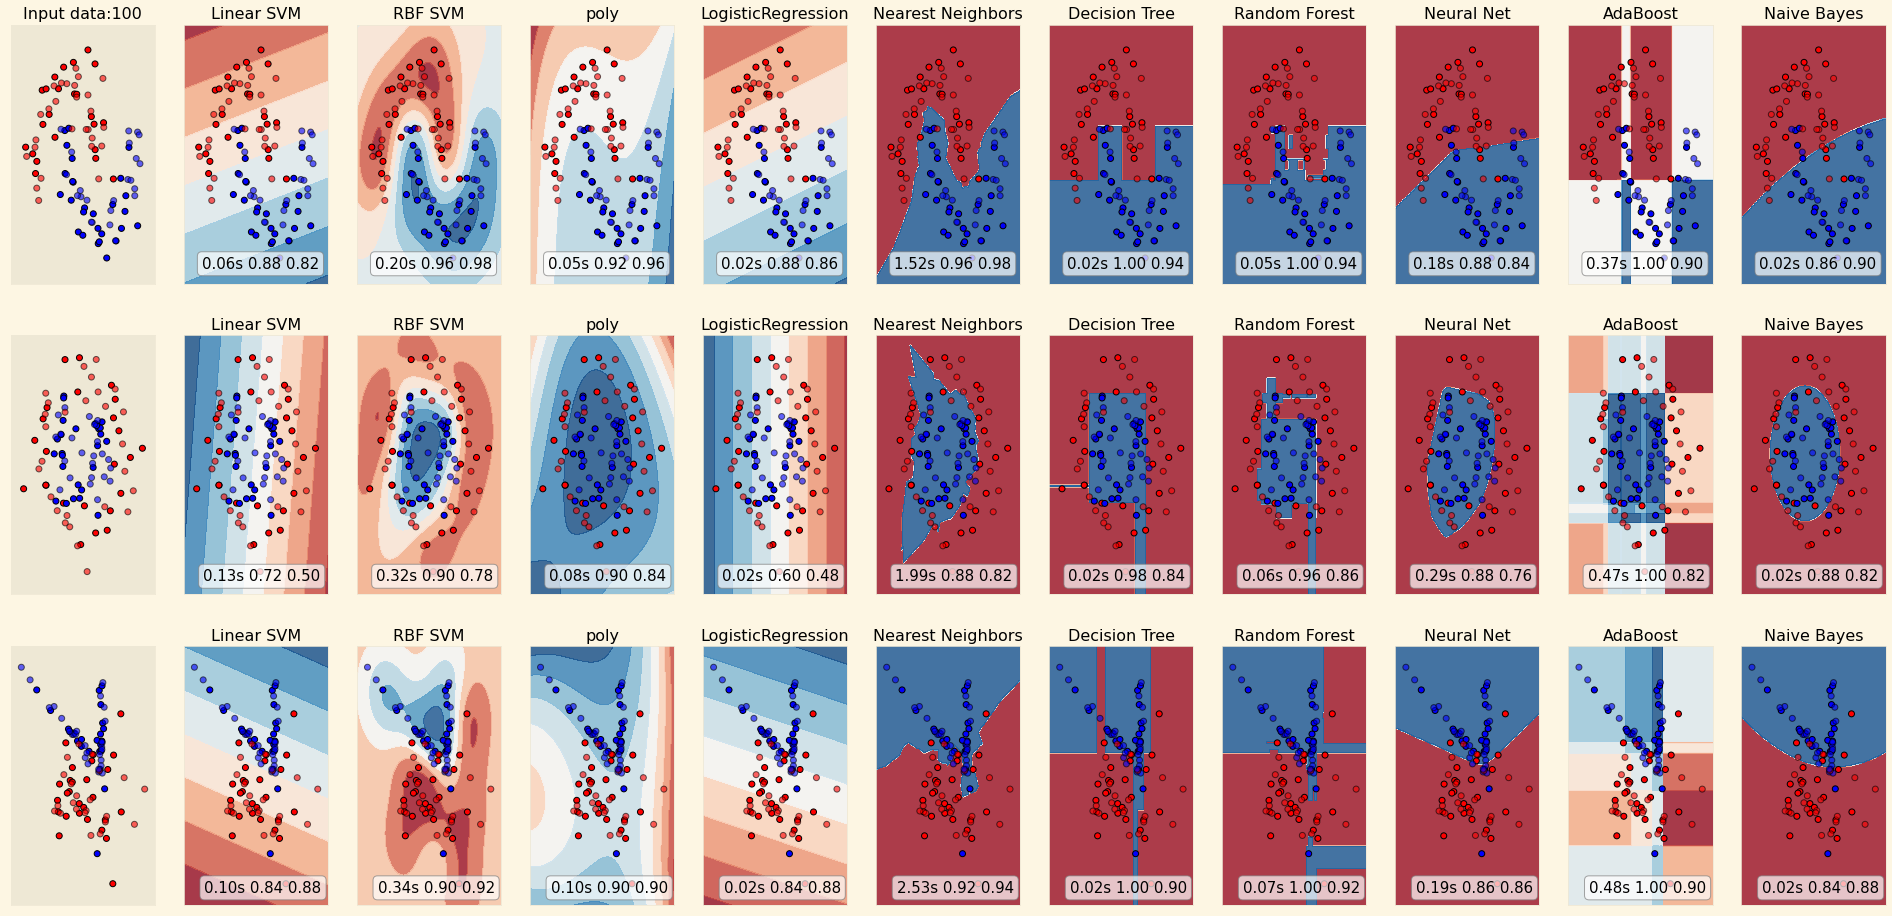

In [69]:
#根据样本数和使用分类器个数计算画布大小
n_wh = ((n_samples / (n_samples if n_samples>5000 else 5000)) + (len(names) / 10)) * 30
figure = plt.figure(figsize=(n_wh+3, n_wh / 3 + 6))
i = 1
# iterate over datasets 遍历数据集
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    # 预处理数据集，分为训练部分和测试部分
    X, y = ds
    # 标准化数据
    X = StandardScaler().fit_transform(X)
    # 切分数据集，用于训练和测试
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=2  #test_size测试集比例
    )



    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  #meshgrid() 用于生成网格采样点矩阵

    # just plot the dataset first 先绘制数据集
    cm = plt.cm.RdBu  #表示颜色图
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])  #样本点颜色（样本分为2个类，所以为两个颜色）
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)  #创建单个子图
    if ds_cnt == 0:  #第一列是输入数据
        ax.set_title("Input data:%s" % n_samples)
    # Plot the training points 绘制训练点
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points 绘制测试点
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())  #用于设置x轴视图限制
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers 遍历分类器
    for name, clf in zip(names, classifiers):
        time_begin = time.time()  #分类器运行开始时间
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train, y_train)  # 训练集R2评分系数
        score_test = clf.score(X_test, y_test)  # 测试集R2评分系数

        # Plot the decision boundary. For that, we will assign a color to each
        # 绘制决策边界。为此，我们将为每一个分配一个颜色
        # 网格中的点 [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):  #检查对象是否拥有决策函数,
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  #用于计算点到超平面的函数距离
        else:
            # Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  #线性可分的,类别概率 https://blog.csdn.net/skyejy/article/details/90664763
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  #线性可分的,类别概率 https://blog.csdn.net/skyejy/article/details/90664763

        time_end = time.time()  #分类器运行结束时间

        # 将结果放入颜色图中
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        # 绘制训练点
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # 绘制测试点
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)

        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2fs %.2f %.2f" % ((time_end - time_begin), score_train, score_test)),
            size=15,
            horizontalalignment="right",
            # 添加文字背景色
            bbox=dict(boxstyle="round",
                      facecolor="w",  # 填充色
                      edgecolor="0.5", # 外框色
                      alpha=0.7)  # 框透明度
        )
        i += 1


In [70]:
plt.tight_layout()  #自动调整子图参数，使之填充整个图像区域。
plt.show()

<Figure size 432x288 with 0 Axes>